In [26]:
from tensorflow import keras
from keras.datasets import boston_housing

(X_train_full,y_train_full),(X_test_full,y_test_full) = boston_housing.load_data()

In [27]:
X_train_full

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [28]:
y_train_full

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [29]:
print(len(X_train_full))
print(len(X_test_full))

404
102


In [30]:
import numpy as np

X_train = np.copy(X_train_full)
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test = np.copy(X_test_full)
X_test -= mean
X_test /= std

In [31]:
X_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [32]:
X_test

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [33]:
y_train = y_train_full
y_test = y_test_full

In [34]:
def build_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=(X_train.shape[1],)))
  model.add(keras.layers.Dense(64,activation="relu"))
  model.add(keras.layers.Dense(64,activation="relu"))
  model.add(keras.layers.Dense(1))

  model.compile(loss="mse",optimizer="rmsprop", metrics=['mae'])
  return model

In [35]:
model = build_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 13)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                896       
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [36]:
k = 4
num_val = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print("processing fold #",i)
  X_val = X_train[i*num_val:(i+1)*num_val]
  y_val = y_train[i*num_val:(i+1)*num_val]
  X_train_part = np.concatenate([X_train[:i*num_val],X_train[(i+1) * num_val:]],axis=0)
  y_train_part = np.concatenate([y_train[:i * num_val],y_train[(i+1)*num_val:]],axis=0)
  
  model = build_model()
  model.fit(X_train_part,y_train_part,epochs=num_epochs,verbose=0)
  val_mse, val_mae = model.evaluate(X_val,y_val,verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [37]:
all_scores

[2.034592628479004, 2.6836256980895996, 2.5331337451934814, 2.502129077911377]

In [38]:
np.mean(all_scores)

2.4383702874183655

In [41]:
k = 4
num_val = len(X_train) // k
num_epochs = 200
# all_scores = []
all_mae_histories = []

for i in range(k):
  print("processing fold #",i)
  X_val = X_train[i*num_val:(i+1)*num_val]
  y_val = y_train[i*num_val:(i+1)*num_val]
  X_train_part = np.concatenate([X_train[:i*num_val],X_train[(i+1) * num_val:]],axis=0)
  y_train_part = np.concatenate([y_train[:i * num_val],y_train[(i+1)*num_val:]],axis=0)
  
  model = build_model()  # 케라스 모델 구성(컴파일 포함)
  history = model.fit(X_train_part, y_train_part,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                    validation_data=(X_val,y_val),
                    epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [42]:
all_mae_histories

[[3.831475257873535,
  3.014333486557007,
  2.6070590019226074,
  2.3206138610839844,
  2.131369113922119,
  2.3373048305511475,
  2.121039628982544,
  2.289138078689575,
  2.0178792476654053,
  1.9999040365219116,
  2.471740484237671,
  2.3626434803009033,
  2.40380597114563,
  2.3979592323303223,
  2.260195255279541,
  1.9440122842788696,
  2.27583909034729,
  1.9632272720336914,
  2.0347626209259033,
  2.043184995651245,
  2.009049415588379,
  2.064481019973755,
  1.9155718088150024,
  1.8304743766784668,
  2.065981864929199,
  2.1297943592071533,
  2.291412830352783,
  2.1086456775665283,
  1.8005558252334595,
  2.258392095565796,
  2.000338077545166,
  2.169628620147705,
  2.0163214206695557,
  2.3056070804595947,
  2.1131346225738525,
  2.3440911769866943,
  2.145200252532959,
  2.243480920791626,
  1.9049739837646484,
  2.5208187103271484,
  2.212449550628662,
  2.096590995788574,
  1.9030486345291138,
  1.9368325471878052,
  2.029486656188965,
  2.0706307888031006,
  2.01028156

In [43]:
ave_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

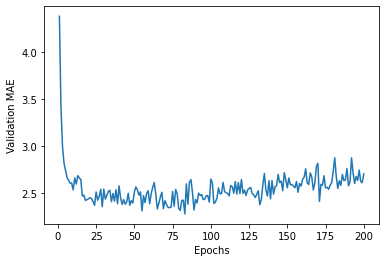

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(ave_mae_history) + 1),ave_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.savefig("annapp_housing_val_epoch_200")
plt.show()

In [45]:
model = build_model()
model.fit(X_train,y_train,epochs=100,verbose=0)
test_mse_score,test_mae_score = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 19.5006 - mean_absolute_error: 2.6398


In [46]:
test_mae_score

2.6397690773010254